# 1. Import packages

In [107]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd

from descartes import PolygonPatch
from shapely.geometry import Point

# 2. Read files

In [2]:
print(os.getcwd())
xlsx_input_path_s = os.getcwd() + "/input"
output_path_s = os.getcwd() + "/output"
os.chdir(xlsx_input_path_s)
print(os.getcwd())

/Users/immanuel/Documents/NEU/05_Spring_2022/CS7675_ResAppr/tasks/MyLab/task21_EU_heatmap
/Users/immanuel/Documents/NEU/05_Spring_2022/CS7675_ResAppr/tasks/MyLab/task21_EU_heatmap/input


In [4]:
eu_df = pd.read_csv("summary_kicho.csv")
eu_gdf = gpd.GeoDataFrame(eu_df)
eu_gdf

,country_of_source_probe,Traceroutes,Unique IPs,Unique Tracker IPs
0,AT,0.579941,1.675978,1.363636
1,BE,0.083091,0.105485,0.272480
2,BG,0.156968,1.118761,1.356852
3,CZ,0.322511,3.523035,4.578313
4,DE,0.561235,2.090301,1.392919
5,DK,0.057615,0.234558,0.142248
6,ES,0.383482,2.273761,2.555066
7,FI,4.259465,4.255319,3.208556
8,FR,0.384404,1.342282,1.108033
9,GR,1.357642,4.195804,3.428571


In [15]:
# https://jan-46106.medium.com/plotting-maps-with-european-data-in-python-part-i-decd83837de4
print(os.getcwd())
json_input_path_s = xlsx_input_path_s + "/ref-nuts-2021-01m.json/"
os.chdir(json_input_path_s)
print(os.getcwd())

/Users/immanuel/Documents/NEU/05_Spring_2022/CS7675_ResAppr/tasks/MyLab/task21_EU_heatmap/input
/Users/immanuel/Documents/NEU/05_Spring_2022/CS7675_ResAppr/tasks/MyLab/task21_EU_heatmap/input/ref-nuts-2021-01m.json


In [16]:
region_path_s = json_input_path_s + "NUTS_RG_01M_2021_3035_LEVL_0.json"
boundary_path_s = json_input_path_s + "NUTS_BN_01M_2021_3035_LEVL_0.json"
label_path_s = json_input_path_s + "NUTS_LB_2021_3035_LEVL_0.json"

region_gdf = gpd.read_file(region_path_s)
boundary_gdf = gpd.read_file(boundary_path_s)
label_gdf = gpd.read_file(label_path_s)

In [17]:
region_gdf

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CZ,CZ,0,CZ,Česko,Česko,0,0,0,CZ,"POLYGON ((4635759.251 3113259.280, 4636316.243..."
1,DE,DE,0,DE,Deutschland,Deutschland,0,0,0,DE,"MULTIPOLYGON (((4355220.961 2715901.981, 43541..."
2,DK,DK,0,DK,Danmark,Danmark,0,0,0,DK,"MULTIPOLYGON (((4650503.156 3591342.705, 46503..."
3,AL,AL,0,AL,Shqipëria,Shqipëria,0,0,0,AL,"MULTIPOLYGON (((5129581.780 2204099.420, 51298..."
4,CY,CY,0,CY,Kýpros,Κύπρος,0,0,0,CY,"MULTIPOLYGON (((6527041.873 1762366.921, 65267..."
5,BG,BG,0,BG,Bulgaria,България,0,0,0,BG,"POLYGON ((5330612.196 2430820.059, 5332042.901..."
6,AT,AT,0,AT,Österreich,Österreich,0,0,0,AT,"MULTIPOLYGON (((4355220.961 2715901.981, 43566..."
7,BE,BE,0,BE,Belgique/België,Belgique/België,0,0,0,BE,"MULTIPOLYGON (((3980660.242 3157892.288, 39782..."
8,EE,EE,0,EE,Eesti,Eesti,0,0,0,EE,"MULTIPOLYGON (((5209286.239 4151086.809, 52101..."
9,EL,EL,0,EL,Elláda,Ελλάδα,0,0,0,EL,"MULTIPOLYGON (((6083861.928 1676463.152, 60836..."


# 3. Data Munging

## 3.1. Dup check

In [21]:
# TRUE is expected
len(set(eu_gdf["country_of_source_probe"])) == len(eu_gdf)

True

In [23]:
# No item under column names is expected
region_gdf[region_gdf["id"] != region_gdf["NUTS_ID"]]

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry


In [24]:
# TRUE is expected
len(set(region_gdf["id"])) == len(region_gdf)

True

## 3.2. crs: Coordinate Reference System

In [25]:
region_gdf.crs = "EPSG:3035"

## 3.3. set_geometry

In [26]:
region_gdf.set_geometry("geometry")

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CZ,CZ,0,CZ,Česko,Česko,0,0,0,CZ,"POLYGON ((4635759.251 3113259.280, 4636316.243..."
1,DE,DE,0,DE,Deutschland,Deutschland,0,0,0,DE,"MULTIPOLYGON (((4355220.961 2715901.981, 43541..."
2,DK,DK,0,DK,Danmark,Danmark,0,0,0,DK,"MULTIPOLYGON (((4650503.156 3591342.705, 46503..."
3,AL,AL,0,AL,Shqipëria,Shqipëria,0,0,0,AL,"MULTIPOLYGON (((5129581.780 2204099.420, 51298..."
4,CY,CY,0,CY,Kýpros,Κύπρος,0,0,0,CY,"MULTIPOLYGON (((6527041.873 1762366.921, 65267..."
5,BG,BG,0,BG,Bulgaria,България,0,0,0,BG,"POLYGON ((5330612.196 2430820.059, 5332042.901..."
6,AT,AT,0,AT,Österreich,Österreich,0,0,0,AT,"MULTIPOLYGON (((4355220.961 2715901.981, 43566..."
7,BE,BE,0,BE,Belgique/België,Belgique/België,0,0,0,BE,"MULTIPOLYGON (((3980660.242 3157892.288, 39782..."
8,EE,EE,0,EE,Eesti,Eesti,0,0,0,EE,"MULTIPOLYGON (((5209286.239 4151086.809, 52101..."
9,EL,EL,0,EL,Elláda,Ελλάδα,0,0,0,EL,"MULTIPOLYGON (((6083861.928 1676463.152, 60836..."


## 3.4. Greece

In [27]:
region_gdf.iloc[9, :]

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/fo

id                                                           EL
NUTS_ID                                                      EL
LEVL_CODE                                                     0
CNTR_CODE                                                    EL
NAME_LATN                                                Elláda
NUTS_NAME                                                Ελλάδα
MOUNT_TYPE                                                    0
URBN_TYPE                                                     0
COAST_TYPE                                                    0
FID                                                          EL
geometry      (POLYGON ((6083861.927762328 1676463.151667081...
Name: 9, dtype: object

In [28]:
region_gdf.iloc[9, 0] = "GR"
region_gdf.iloc[9, 1] = "GR"
region_gdf.iloc[9, 3] = "GR"
region_gdf.iloc[9, 4] = "Greece"
region_gdf.iloc[9, 9] = "FID"

In [29]:
region_gdf.iloc[9, :]

id                                                           GR
NUTS_ID                                                      GR
LEVL_CODE                                                     0
CNTR_CODE                                                    GR
NAME_LATN                                                Greece
NUTS_NAME                                                Ελλάδα
MOUNT_TYPE                                                    0
URBN_TYPE                                                     0
COAST_TYPE                                                    0
FID                                                         FID
geometry      (POLYGON ((6083861.927762328 1676463.151667081...
Name: 9, dtype: object

## 3.5. Rename columns

In [30]:
eu_gdf.columns

Index(['country_of_source_probe', 'Traceroutes', 'Unique IPs',
       'Unique Tracker IPs'],
      dtype='object')

In [32]:
# eu_gdf.columns = ['id', 'Perc. Non-Adequate (Unique IPs)',
#        'Perc. Non-Adequate (Unique Tracker IPs)',
#        'Perc. Non-Adequate Traceroutes']

In [37]:
eu_gdf.columns = ['id', 'Traceroutes', 'Unique IPs',
       'Unique Tracker IPs']

In [38]:
eu_gdf.columns

Index(['id', 'Traceroutes', 'Unique IPs', 'Unique Tracker IPs'], dtype='object')

## 3.6. Merge

In [39]:
gdf = region_gdf.merge(eu_gdf, on='id')

In [40]:
len(eu_gdf) == len(gdf)

True

In [41]:
gdf

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,Traceroutes,Unique IPs,Unique Tracker IPs
0,CZ,CZ,0,CZ,Česko,Česko,0,0,0,CZ,"POLYGON ((4635759.251 3113259.280, 4636316.243...",0.322511,3.523035,4.578313
1,DE,DE,0,DE,Deutschland,Deutschland,0,0,0,DE,"MULTIPOLYGON (((4355220.961 2715901.981, 43541...",0.561235,2.090301,1.392919
2,DK,DK,0,DK,Danmark,Danmark,0,0,0,DK,"MULTIPOLYGON (((4650503.156 3591342.705, 46503...",0.057615,0.234558,0.142248
3,BG,BG,0,BG,Bulgaria,България,0,0,0,BG,"POLYGON ((5330612.196 2430820.059, 5332042.901...",0.156968,1.118761,1.356852
4,AT,AT,0,AT,Österreich,Österreich,0,0,0,AT,"MULTIPOLYGON (((4355220.961 2715901.981, 43566...",0.579941,1.675978,1.363636
5,BE,BE,0,BE,Belgique/België,Belgique/België,0,0,0,BE,"MULTIPOLYGON (((3980660.242 3157892.288, 39782...",0.083091,0.105485,0.272480
6,GR,GR,0,GR,Greece,Ελλάδα,0,0,0,FID,"MULTIPOLYGON (((6083861.928 1676463.152, 60836...",1.357642,4.195804,3.428571
7,ES,ES,0,ES,España,España,0,0,0,ES,"MULTIPOLYGON (((3815026.120 1904966.963, 38157...",0.383482,2.273761,2.555066
8,FI,FI,0,FI,Suomi/Finland,Suomi/Finland,0,0,0,FI,"MULTIPOLYGON (((5073773.369 5207014.607, 50708...",4.259465,4.255319,3.208556
9,FR,FR,0,FR,France,France,0,0,0,FR,"MULTIPOLYGON (((9981287.654 -3029241.553, 9982...",0.384404,1.342282,1.108033


## 3.7. LEFT JOIN

In [84]:
region_gdf.shape

(37, 11)

In [85]:
eu_gdf.shape

(20, 4)

In [112]:
# https://stackoverflow.com/questions/49487263/pandas-left-join-where-right-is-null-on-multiple-columns
excluded_gdf = region_gdf.merge(eu_gdf, on='id', indicator='i', how='outer').query('i == "left_only"').drop('i', axis=1)

In [115]:
excluded_gdf.shape

(17, 14)

In [113]:
len(excluded_gdf) == len(region_gdf) - len(eu_gdf)

True

In [114]:
excluded_gdf

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,Traceroutes,Unique IPs,Unique Tracker IPs
3,AL,AL,0,AL,Shqipëria,Shqipëria,0,0,0,AL,"MULTIPOLYGON (((5129581.780 2204099.420, 51298...",NaN,NaN,NaN
4,CY,CY,0,CY,Kýpros,Κύπρος,0,0,0,CY,"MULTIPOLYGON (((6527041.873 1762366.921, 65267...",NaN,NaN,NaN
8,EE,EE,0,EE,Eesti,Eesti,0,0,0,EE,"MULTIPOLYGON (((5209286.239 4151086.809, 52101...",NaN,NaN,NaN
14,CH,CH,0,CH,Schweiz/Suisse/Svizzera,Schweiz/Suisse/Svizzera,0,0,0,CH,"POLYGON ((4139577.697 2722540.536, 4140647.995...",NaN,NaN,NaN
17,IS,IS,0,IS,Ísland,Ísland,0,0,0,IS,"MULTIPOLYGON (((2801934.173 4882219.514, 28004...",NaN,NaN,NaN
19,LV,LV,0,LV,Latvija,Latvija,0,0,0,LV,"MULTIPOLYGON (((5350183.365 3949792.483, 53507...",NaN,NaN,NaN
20,ME,ME,0,ME,Crna Gora,Црна Гора,0,0,0,ME,"MULTIPOLYGON (((5014568.399 2200028.202, 50152...",NaN,NaN,NaN
21,MT,MT,0,MT,Malta,Malta,0,0,0,MT,"MULTIPOLYGON (((4718423.412 1448636.087, 47190...",NaN,NaN,NaN
22,MK,MK,0,MK,Severna Makedonija,Северна Македонија,0,0,0,MK,"POLYGON ((5338322.713 2217741.759, 5338923.390...",NaN,NaN,NaN
23,LT,LT,0,LT,Lietuva,Lietuva,0,0,0,LT,"MULTIPOLYGON (((5007414.874 3715788.768, 50086...",NaN,NaN,NaN


# 4. Plots

## 4.1. Setups

In [21]:
# fig, ax = plt.subplots(1, figsize=(10, 10))
# fig, ax = plt.subplots(1, 1)
# plt.xticks(rotation=90)

In [22]:
# gdf.plot(column="Perc. Non-Adequate (Unique IPs)", cmap="gray", linewidth=0.4, ax=ax, edgecolor=".4", legend=True)

In [42]:
print(os.getcwd())
os.chdir(output_path_s)
print(os.getcwd())

/Users/immanuel/Documents/NEU/05_Spring_2022/CS7675_ResAppr/tasks/MyLab/task21_EU_heatmap/input/ref-nuts-2021-01m.json
/Users/immanuel/Documents/NEU/05_Spring_2022/CS7675_ResAppr/tasks/MyLab/task21_EU_heatmap/output


In [43]:
MIL = 10**6

In [72]:
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams.update({'font.size': 22})
# plt.rcParams["legend.title_fontsize"]=100

## 4.2. Function

In [118]:
def highlight_excluded_countries(plot, color="green", alpha_level=0.5):
    for i in range(len(excluded_gdf)):
        plot.add_patch(PolygonPatch(excluded_gdf.iloc[i,10], fc=color, alpha=alpha_level))

## 4.3. Actual Plots

/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


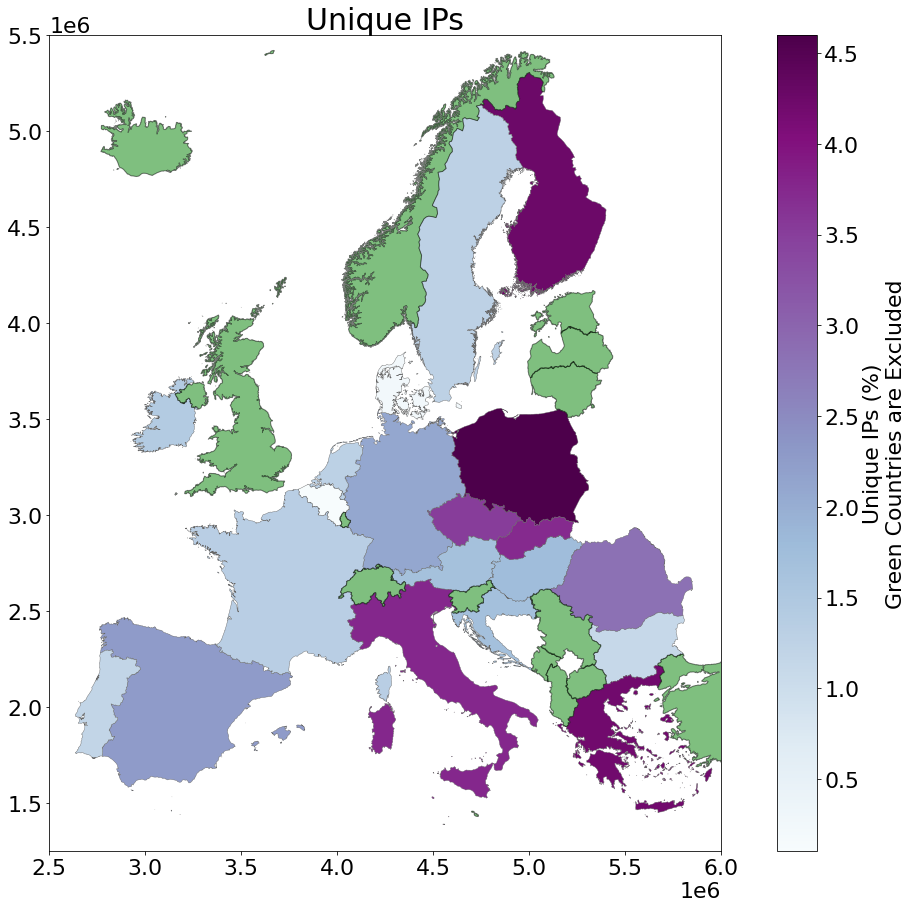

In [120]:
eu_plot = gdf.plot(column="Unique IPs", cmap="BuPu", linewidth=0.4, edgecolor=".4", figsize=(20,15),
                   legend=True, legend_kwds={"label": "Unique IPs (%)\nGreen Countries are Excluded."})
minx, miny, maxx, maxy = gdf.total_bounds
minx, miny, maxx, maxy = 2.5*MIL, 1.25*MIL, 6*MIL, 5.5*MIL
eu_plot.set_xlim(minx, maxx)
eu_plot.set_ylim(miny, maxy)
eu_plot.set_title("Unique IPs", fontdict={"fontsize":30})
highlight_excluded_countries(eu_plot)
plt.savefig("unique_ip.png")

/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


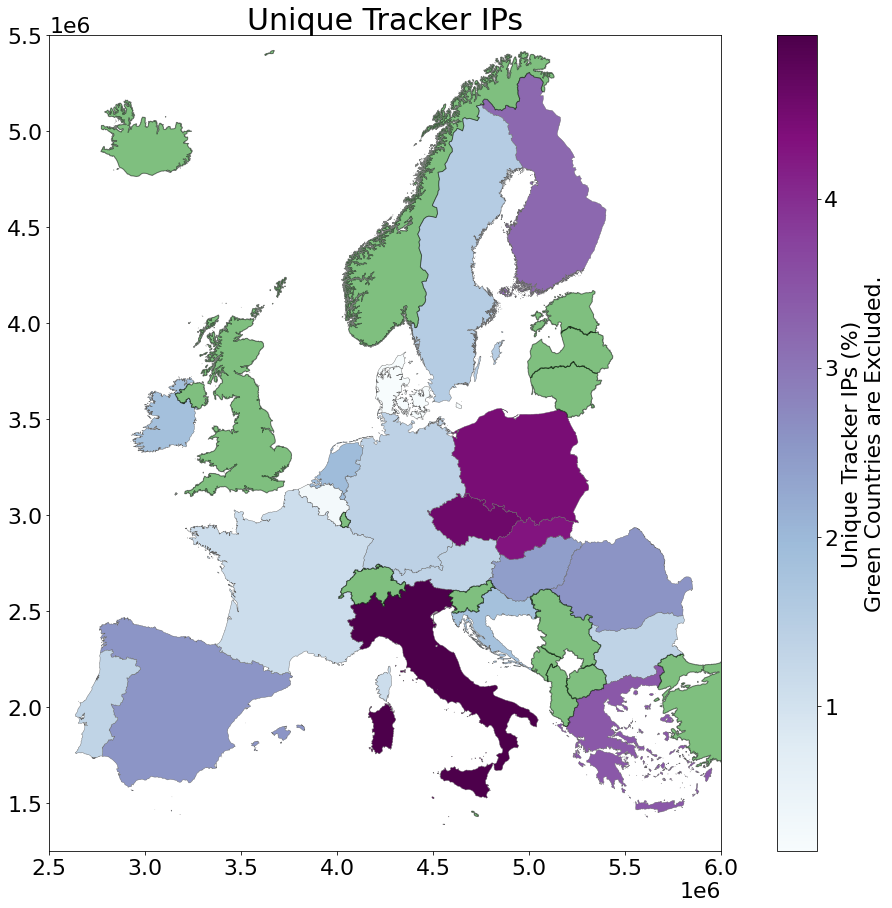

In [122]:
eu_plot = gdf.plot(column="Unique Tracker IPs", cmap="BuPu", linewidth=0.4, edgecolor=".4", figsize=(20,15),
                   legend=True, legend_kwds={"label": "Unique Tracker IPs (%)\nGreen Countries are Excluded."})
eu_plot.set_xlim(minx, maxx)
eu_plot.set_ylim(miny, maxy)
eu_plot.set_title("Unique Tracker IPs", fontdict={"fontsize":30})
highlight_excluded_countries(eu_plot)
plt.savefig("unique_tracker_ip.png")

/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


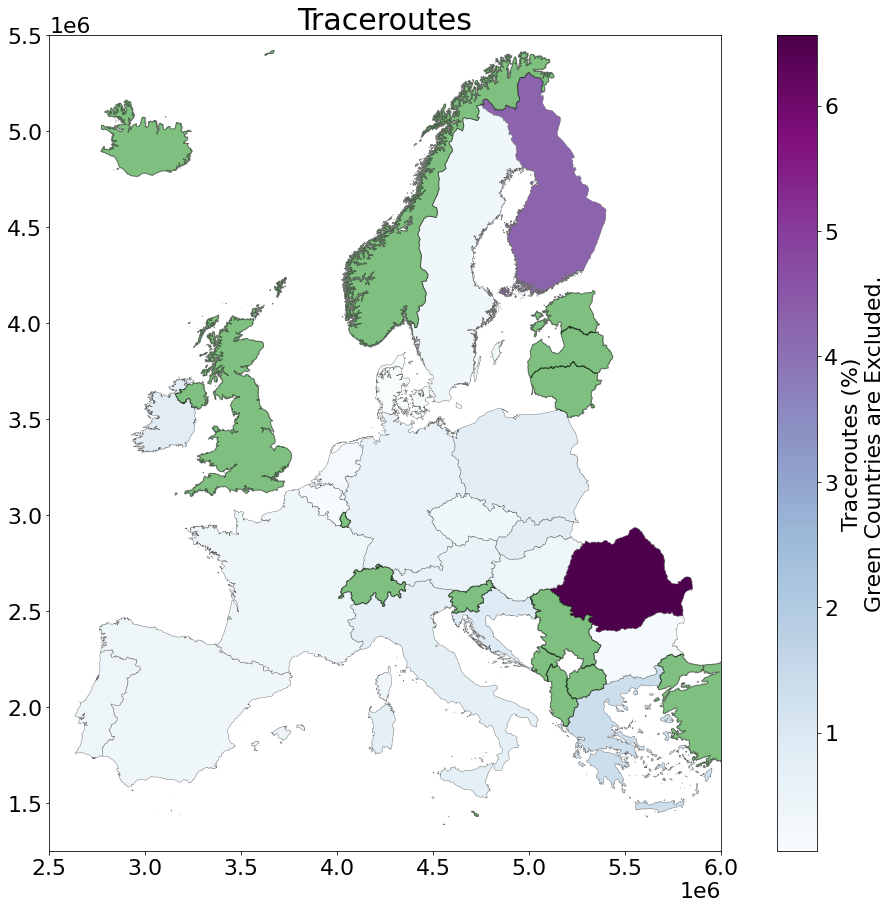

In [123]:
eu_plot = gdf.plot(column="Traceroutes", cmap="BuPu", linewidth=0.4, edgecolor=".4", figsize=(20,15),
                   legend=True, legend_kwds={"label": "Traceroutes (%)\nGreen Countries are Excluded."})
eu_plot.set_xlim(minx, maxx)
eu_plot.set_ylim(miny, maxy)
eu_plot.set_title("Traceroutes", fontdict={"fontsize":30})
highlight_excluded_countries(eu_plot)
plt.savefig("traceroute.png")